# Estatísticas dos parâmetros de um modelo

1. Faça uma função que receba como entrada uma rede neural e retorne um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
    * O maior e menor valor do parâmetro;
    * O maior e menor valor do gradiente do parâmetro;
2. Faça uma função que receba o dicionário de 1 e retorne o menor e maior valor dentre todos os parâmetros e todos os gradientes (4 valores no total);
2. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**
    

Exemplo

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import models
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Imagem aleatória para ilustração
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

In [27]:
def max_grad(model):
    """Máximo valor de gradiente de cada parâmetro."""

    stats = {}
    # model.named_parameters() retorna os nomes e respectivos parâmetros do
    # modelo
    for param_name, param in model.named_parameters():
        grad = param.grad
        g_max = grad.max()
        stats[param_name] = {'g_max':g_max.item()}

    return stats

# Aplica o modelo
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

max_grad(model)

{'conv1.weight': {'g_max': 0.0008390070288442075},
 'bn1.weight': {'g_max': 0.0006833511870354414},
 'bn1.bias': {'g_max': 0.0001682289585005492},
 'layer1.0.conv1.weight': {'g_max': 0.00027410691836848855},
 'layer1.0.bn1.weight': {'g_max': 0.000331930787069723},
 'layer1.0.bn1.bias': {'g_max': 0.00034001003950834274},
 'layer1.0.conv2.weight': {'g_max': 0.0001878413459053263},
 'layer1.0.bn2.weight': {'g_max': 0.0005678124143742025},
 'layer1.0.bn2.bias': {'g_max': 0.00014152619405649602},
 'layer1.1.conv1.weight': {'g_max': 0.00013427791418507695},
 'layer1.1.bn1.weight': {'g_max': 0.00041988922748714685},
 'layer1.1.bn1.bias': {'g_max': 0.00025621350505389273},
 'layer1.1.conv2.weight': {'g_max': 0.00012668622366618365},
 'layer1.1.bn2.weight': {'g_max': 0.00038318595034070313},
 'layer1.1.bn2.bias': {'g_max': 0.00011808463023044169},
 'layer2.0.conv1.weight': {'g_max': 0.00019701046403497458},
 'layer2.0.bn1.weight': {'g_max': 0.0005290545523166656},
 'layer2.0.bn1.bias': {'g_max'

# 1. Função que recebe como entrada uma rede neural e retorna um dicionário no qual cada chave é o nome de um parâmetro do modelo e os respectivos valores são:
* O maior e menor valor do parâmetro;
* O maior e menor valor do gradiente do parâmetro.


In [28]:
def get_model_stats(model):
    """Retorna estatísticas dos parâmetros de um modelo neural.
    
    Para cada parâmetro, retorna o maior e menor valor do parâmetro
    e o maior e menor valor do gradiente do parâmetro.
    """
    stats = {}
    for param_name, param in model.named_parameters():
        # Valores do parâmetro
        param_max = param.max().item()
        param_min = param.min().item()
        
        # Valores do gradiente
        if param.grad is not None:
            grad_max = param.grad.max().item()
            grad_min = param.grad.min().item()
        else:
            grad_max = None
            grad_min = None
        
        stats[param_name] = {
            'param_max': param_max,
            'param_min': param_min,
            'grad_max': grad_max,
            'grad_min': grad_min
        }
    
    return stats


# 1.1. Utilização da função criada




In [29]:
# Criação de um modelo e cálculo dos gradientes como no notebook original
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

# Obtém as estatísticas dos parâmetros
stats = get_model_stats(model)

# Exibe as estatísticas
for param, stat in stats.items():
    print(f"{param}: {stat}")

conv1.weight: {'param_max': 1.0164732933044434, 'param_min': -0.8433799147605896, 'grad_max': 0.0006806064629927278, 'grad_min': -0.0006888334173709154}
bn1.weight: {'param_max': 0.5258306860923767, 'param_min': -5.1095959463509644e-08, 'grad_max': 0.0004950285656377673, 'grad_min': -0.0007219887338578701}
bn1.bias: {'param_max': 0.6759758591651917, 'param_min': -0.66438889503479, 'grad_max': 0.00017929886234924197, 'grad_min': -0.00015539798187091947}
layer1.0.conv1.weight: {'param_max': 0.6196322441101074, 'param_min': -0.7993080019950867, 'grad_max': 0.00024450442288070917, 'grad_min': -0.00022961522336117923}
layer1.0.bn1.weight: {'param_max': 0.6440200805664062, 'param_min': 0.16826024651527405, 'grad_max': 0.0003951690741814673, 'grad_min': -0.0004168688028585166}
layer1.0.bn1.bias: {'param_max': 0.3294556438922882, 'param_min': -0.5315352082252502, 'grad_max': 0.0003726734430529177, 'grad_min': -0.0003272329340688884}
layer1.0.conv2.weight: {'param_max': 0.285553902387619, 'para

# 2. Função que recebe o dicionário da função 1. e retorna o menor e maior valor dentre todos os parâmetros e todos os gradientes, sendo 4 valores no total.

In [30]:
def get_overall_stats(stats):
    """Retorna o menor e maior valor dentre todos os parâmetros e gradientes.

    Args:
        stats (dict): Dicionário com estatísticas dos parâmetros e gradientes.

    Returns:
        dict: Dicionário com os menores e maiores valores.
    """
    # Inicializa variáveis para armazenar os valores mínimos e máximos
    overall_param_min = float('inf')
    overall_param_max = float('-inf')
    overall_grad_min = float('inf')
    overall_grad_max = float('-inf')
    
    for param, values in stats.items():
        # Atualiza os valores mínimos e máximos dos parâmetros
        overall_param_min = min(overall_param_min, values['param_min'])
        overall_param_max = max(overall_param_max, values['param_max'])
        
        # Atualiza os valores mínimos e máximos dos gradientes, se disponíveis
        if values['grad_min'] is not None:
            overall_grad_min = min(overall_grad_min, values['grad_min'])
        if values['grad_max'] is not None:
            overall_grad_max = max(overall_grad_max, values['grad_max'])
    
    return {
        'overall_param_min': overall_param_min,
        'overall_param_max': overall_param_max,
        'overall_grad_min': overall_grad_min,
        'overall_grad_max': overall_grad_max
    }


# 2.1. Utilização da função 

# Criação de um modelo e cálculo dos gradientes como no notebook original



In [31]:
img = torch.rand(1, 3, 224, 224)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Passa a imagem pelo modelo para calcular os scores
scores = model(img)
# Calcula os gradientes (em um treinamento real seria loss.backward())
scores.sum().backward()

# Obtém as estatísticas dos parâmetros
stats = get_model_stats(model)

# Exibe as estatísticas dos parâmetros individuais
for param, stat in stats.items():
    print(f"{param}: {stat}")

# Obtém as estatísticas gerais
overall_stats = get_overall_stats(stats)

# Exibe as estatísticas gerais
print("\nEstatísticas Gerais:")
print(f"Menor valor dos parâmetros: {overall_stats['overall_param_min']}")
print(f"Maior valor dos parâmetros: {overall_stats['overall_param_max']}")
print(f"Menor valor dos gradientes: {overall_stats['overall_grad_min']}")
print(f"Maior valor dos gradientes: {overall_stats['overall_grad_max']}")

conv1.weight: {'param_max': 1.0164732933044434, 'param_min': -0.8433799147605896, 'grad_max': 0.0005799271166324615, 'grad_min': -0.0005131415091454983}
bn1.weight: {'param_max': 0.5258306860923767, 'param_min': -5.1095959463509644e-08, 'grad_max': 0.0006690240115858614, 'grad_min': -0.0007036610622890294}
bn1.bias: {'param_max': 0.6759758591651917, 'param_min': -0.66438889503479, 'grad_max': 0.00021622632630169392, 'grad_min': -0.0002900414983741939}
layer1.0.conv1.weight: {'param_max': 0.6196322441101074, 'param_min': -0.7993080019950867, 'grad_max': 0.00020099720859434456, 'grad_min': -0.000265418115304783}
layer1.0.bn1.weight: {'param_max': 0.6440200805664062, 'param_min': 0.16826024651527405, 'grad_max': 0.0003748396993614733, 'grad_min': -0.0003025309706572443}
layer1.0.bn1.bias: {'param_max': 0.3294556438922882, 'param_min': -0.5315352082252502, 'grad_max': 0.00017505683354102075, 'grad_min': -0.0001996581704588607}
layer1.0.conv2.weight: {'param_max': 0.285553902387619, 'param_

3. Modifique o script de treinamento visto nas aulas para plotar além da loss e da acurácia, os menores e maiores valores retornados em 2. Crie um terceiro gráfico (além do gráfico da loss e acurácia), para mostrar os valores. Os valores devem ser plotados **durante o treinamento da rede**

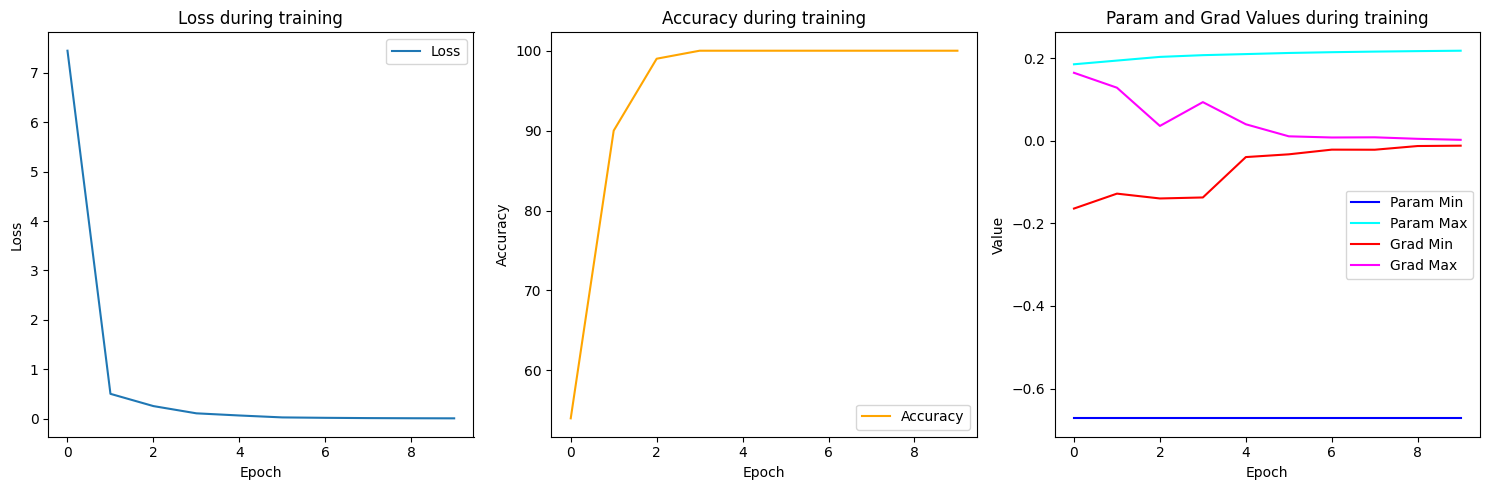

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import torch.nn.functional as F

# Gerar dados aleatórios
img = torch.rand(100, 3, 224, 224)
targets = torch.randint(0, 2, (100,))  # 100 rótulos binários aleatórios

# Dataset e DataLoader
dataset = TensorDataset(img, targets)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Rede Neural Simples
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 224 * 224, 2)  # assuming output is 2 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

model = SimpleCNN()

def get_model_stats(model):
    stats = {}
    for param_name, param in model.named_parameters():
        param_max = param.max().item()
        param_min = param.min().item()
        
        if param.grad is not None:
            grad_max = param.grad.max().item()
            grad_min = param.grad.min().item()
        else:
            grad_max = None
            grad_min = None
        
        stats[param_name] = {
            'param_max': param_max,
            'param_min': param_min,
            'grad_max': grad_max,
            'grad_min': grad_min
        }
    
    return stats

def get_overall_stats(stats):
    overall_param_min = float('inf')
    overall_param_max = float('-inf')
    overall_grad_min = float('inf')
    overall_grad_max = float('-inf')
    
    for param, values in stats.items():
        overall_param_min = min(overall_param_min, values['param_min'])
        overall_param_max = max(overall_param_max, values['param_max'])
        
        if values['grad_min'] is not None:
            overall_grad_min = min(overall_grad_min, values['grad_min'])
        if values['grad_max'] is not None:
            overall_grad_max = max(overall_grad_max, values['grad_max'])
    
    return {
        'overall_param_min': overall_param_min,
        'overall_param_max': overall_param_max,
        'overall_grad_min': overall_grad_min,
        'overall_grad_max': overall_grad_max
    }

def train(model, dataloader, num_epochs, lr):
    loss_func = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=lr)
    
    losses = []
    accuracies = []
    param_min_values = []
    param_max_values = []
    grad_min_values = []
    grad_max_values = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        
        for inputs, targets in dataloader:
            optim.zero_grad()
            scores = model(inputs)
            loss = loss_func(scores, targets)
            loss.backward()
            optim.step()
            
            # Accumulate epoch statistics
            epoch_loss += loss.item()
            _, predicted = scores.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
        
        # Calculate accuracy for the epoch
        accuracy = 100. * correct / total
        losses.append(epoch_loss / len(dataloader))
        accuracies.append(accuracy)
        
        # Get overall stats
        stats = get_model_stats(model)
        overall_stats = get_overall_stats(stats)
        
        param_min_values.append(overall_stats['overall_param_min'])
        param_max_values.append(overall_stats['overall_param_max'])
        grad_min_values.append(overall_stats['overall_grad_min'])
        grad_max_values.append(overall_stats['overall_grad_max'])
    
    return losses, accuracies, param_min_values, param_max_values, grad_min_values, grad_max_values

# Inicialização do modelo
model = SimpleCNN()

# Treinamento do modelo
num_epochs = 10
learning_rate = 0.01
losses, accuracies, param_min_values, param_max_values, grad_min_values, grad_max_values = train(model, dataloader, num_epochs, learning_rate)

# Plotting
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()

# Accuracy plot
plt.subplot(1, 3, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy during training')
plt.legend()

# Parameter and Gradient Values plot
plt.subplot(1, 3, 3)
plt.plot(param_min_values, label='Param Min', color='blue')
plt.plot(param_max_values, label='Param Max', color='cyan')
plt.plot(grad_min_values, label='Grad Min', color='red')
plt.plot(grad_max_values, label='Grad Max', color='magenta')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Param and Grad Values during training')
plt.legend()

plt.tight_layout()
plt.show()
